In [ ]:
import pandas as pd
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/grupo I me315/dados_anos.db')

In [ ]:

periodos = {
    1: {"INICIO": "06/20", "FIM": "09/22"},
    2: {"INICIO": "06/21", "FIM": "09/22"},
    3: {"INICIO": "06/21", "FIM": "09/23"}
}
periodos2 = {
    1: {"INICIO": "06-20", "FIM": "09-22"},
    2: {"INICIO": "06-21", "FIM": "09-22"},
    3: {"INICIO": "06-21", "FIM": "09-23"}
}
periodo_1_anos = {2000, 2004, 2008, 2012, 2016, 2020, 2024}
periodo_2_anos = {2001, 2005, 2013, 2014, 2017, 2018, 2021, 2022}
periodo_3_anos = {2002, 2003, 2006, 2007, 2009, 2010, 2011, 2015, 2019, 2023}
conn = sqlite3.connect('/content/drive/MyDrive/grupo I me315/dados_anos.db')
resultados = []
for ano in range(2000, 2025):
    periodos_selecionado = periodos2 if ano < 2019 else periodos
    if ano in periodo_1_anos:
        periodo = periodos_selecionado[1]
    elif ano in periodo_2_anos:
        periodo = periodos_selecionado[2]
    else:
        periodo = periodos_selecionado[3]
    inicio = f"{ano}-{periodo['INICIO']}" if ano < 2019 else f"{ano}/{periodo['INICIO']}"
    fim = f"{ano}-{periodo['FIM']}" if ano < 2019 else f"{ano}/{periodo['FIM']}"
    tabela_ano = f"dados_{ano}"
    query = f"""
    SELECT
        data AS Data,
        estacao,
    MAX(bulbo_seco) AS TemperaturaMaxima,
    MIN(bulbo_seco) AS TemperaturaMinima
    FROM {tabela_ano}
    WHERE data BETWEEN '{inicio}' AND '{fim}'
    GROUP BY data, estacao
    """
    try:
        df = pd.read_sql_query(query, conn)
        if df.empty:
            print(f"A consulta para o ano {ano} não retornou nenhum dado.")
        else:
            df['TemperaturaMaxima'] = pd.to_numeric(df['TemperaturaMaxima'], errors='coerce')
            df['TemperaturaMinima'] = pd.to_numeric(df['TemperaturaMinima'], errors='coerce')
            df['amplitude'] = df['TemperaturaMaxima'] - df['TemperaturaMinima']
            df['ano'] = ano
            resultados.append(df)
    except Exception as e:
        print(f"Erro ao acessar a tabela {tabela_ano}: {e}")
if resultados:
    resultado_final = pd.concat(resultados, ignore_index=True)
    print(resultado_final)
else:
    print("Nenhum dado foi retornado para todos os anos.")


              Data estacao  TemperaturaMaxima  TemperaturaMinima  amplitude  \
0       2000-06-20    A001               27.3               13.9       13.4   
1       2000-06-20    A101               29.9               22.5        7.4   
2       2000-06-20    A401                NaN                NaN        NaN   
3       2000-06-20    A601               29.7               18.4       11.3   
4       2000-06-21    A001               26.0               14.3       11.7   
...            ...     ...                ...                ...        ...   
869761  2024/09/22    B803               32.4               19.6       12.8   
869762  2024/09/22    B804               28.1               18.2        9.9   
869763  2024/09/22    B806               28.4               11.4       17.0   
869764  2024/09/22    B807               29.5               15.0       14.5   
869765  2024/09/22    F501               28.1               16.8       11.3   

         ano  
0       2000  
1       2000  
2     

In [ ]:
resultado_final.to_csv('dados_temperaturas.csv', index=False)

In [ ]:
import polars as pl

In [ ]:
dados_temperaturas = pl.read_csv('dados_temperaturas.csv')

In [ ]:

tabela_amplitude = (
dados_temperaturas.drop_nulls()
.group_by(pl.col('ano'))
.agg(pl.col('amplitude').mean().round(2))
.sort('ano')

)

In [ ]:
from plotnine import ggplot, geom_line, aes, theme_bw, labs, geom_point, facet_wrap, facet_grid, stat_smooth, geom_smooth


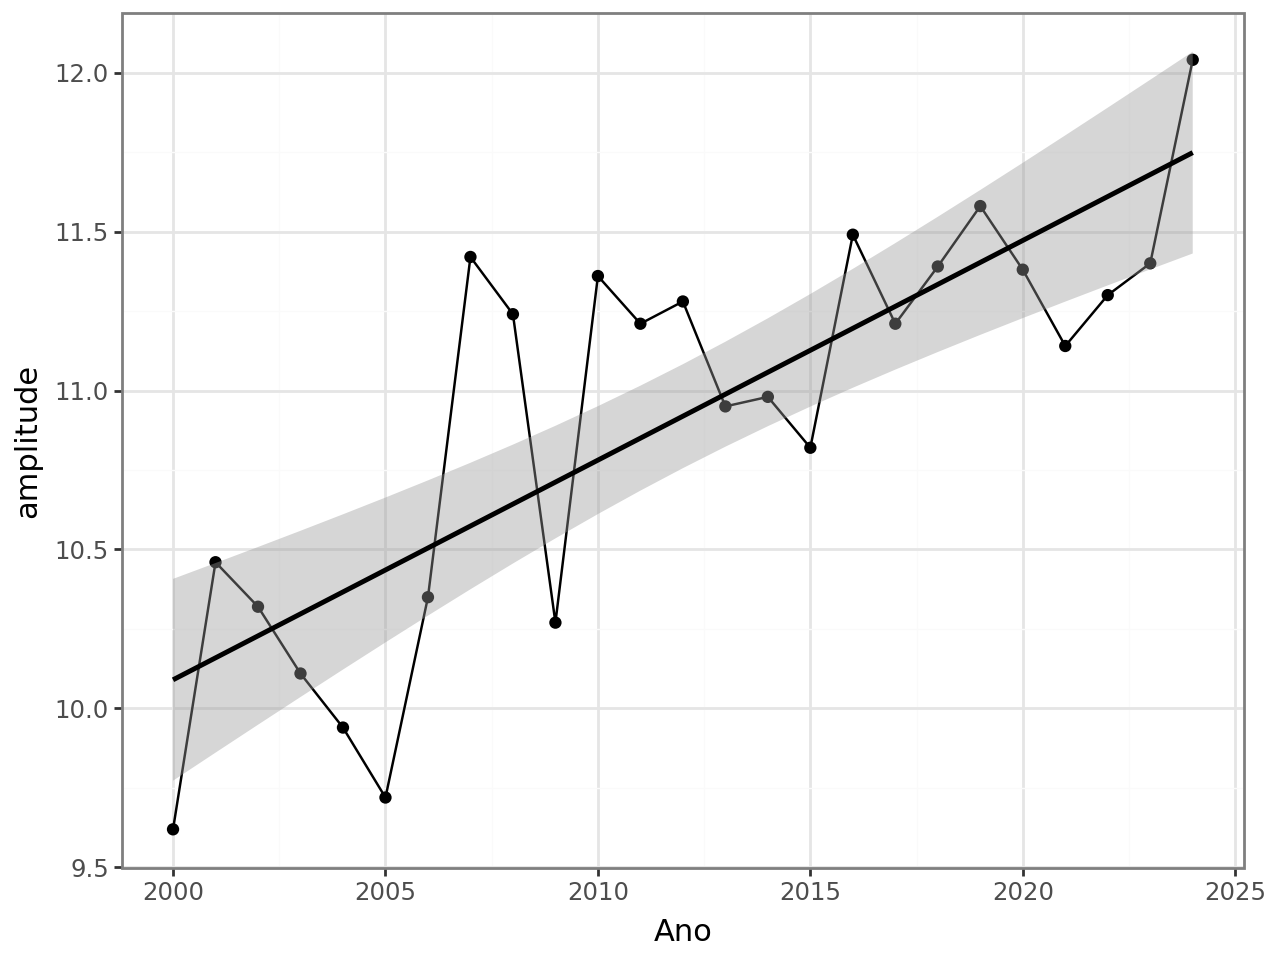

In [ ]:
(
ggplot(tabela_amplitude, aes(x= "ano", y = "amplitude"))
+ geom_point()
+ geom_line()
+ geom_smooth(method='lm')
+ theme_bw()
+ labs(x="Ano", y="amplitude")
)